In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


setelah mengimport library saya akan menampilkan data yang akan saya import dengan nama iris.csv

In [18]:
dataset = pd.read_csv('iris.csv')

In [19]:
print(dataset)

      No  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  

lalu yang akan saya lakukan selanjutnya adalah memisahkan label dengan fitur agar tidak bercampur

In [20]:

feature_cols = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
X = dataset[feature_cols]
y = dataset.Species 


In [ ]:
di bawah ini adalah hasil dari fitur yang telah di pisahkan dengan label

In [21]:
print(X)


     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0              5.1           3.5            1.4           0.2
1              4.9           3.0            1.4           0.2
2              4.7           3.2            1.3           0.2
3              4.6           3.1            1.5           0.2
4              5.0           3.6            1.4           0.2
..             ...           ...            ...           ...
145            6.7           3.0            5.2           2.3
146            6.3           2.5            5.0           1.9
147            6.5           3.0            5.2           2.0
148            6.2           3.4            5.4           2.3
149            5.9           3.0            5.1           1.8

[150 rows x 4 columns]


sedangkan di bawah ini adalah label yang telah di pisahkan dari fitur

In [22]:
print(y)

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object


lalu saya membagi data test dan train sesuai dengan perintah yaitu 0.8/0.2 atau 80% / 20%

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) #data test nya 20%

rumus index gini yang di gunakan $1 - \sum_{i=1}^{k} (p_i)^2$

di kasus ini saya menggunakan kriteria gini dan membatasi kedalaman pohon dengan 4 ,dan juga ada beberapa argumen
Argumen X_train adalah matriks data training yang berisi fitur-fitur dari data,
argumen y_train adalah vektor label atau kelas dari data training yang digunakan untuk mengawasi proses pelatihan

In [40]:
clf_tree = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1)
clf_tree.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=4, random_state=1)

dan selanjutnya saya akan melakukan testing dari X_test

In [41]:

y_pred = clf_tree.predict(X_test)

berikut adalah visualisasi dari pohon keputusan dengan menggunakan ploting dari mathplotlip

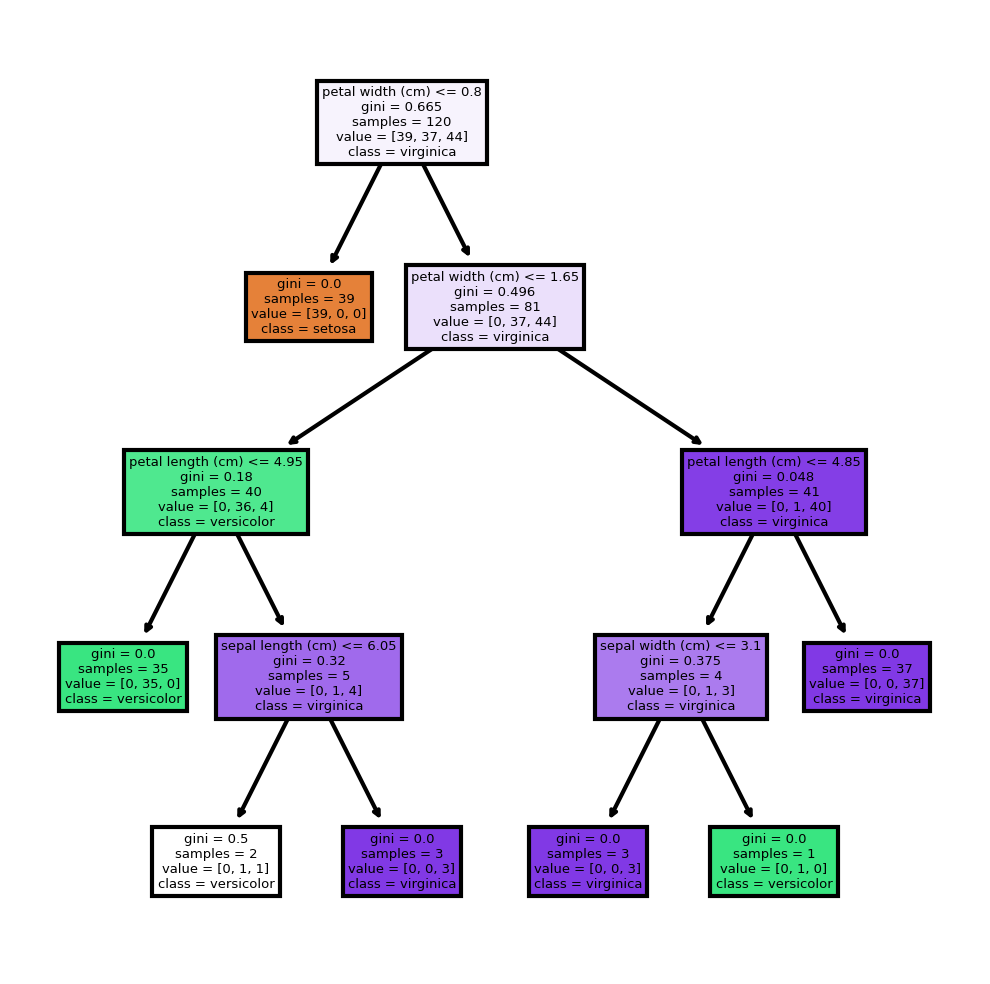

In [77]:
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(clf_tree,
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('imagename.png')

lalu sesuai perintah saya akan menghitung akurasi dari decision tree

In [78]:

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.9666666666666667


# __________________________________________________________________

# membandingkan decision tree dengan KNN dan NAIVE BAYES

# __________________________________________________________________

# KNN

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

di sini saya menggunakan minkowski untuk menghitung jarak menggunakan minkowski

ini adalah rumus minkowski

$\left(\sum_{i=1}^n\left|x_i-y_i\right|^p\right)^{\frac{1}{p}}$

In [79]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

di bawahini berguna untuk melakukan prediksi pada x_test

In [80]:
knn_pred = classifier.predict(X_test)


dengan menggunakanjumlah data train dan data test yang sama dengan menggunkaan KNN dengan cara menghiutung jarak minkowski di temukan hasil yang lebih tinggi 100%

In [81]:
from sklearn.metrics import confusion_matrix,accuracy_score
ac = accuracy_score(y_test,knn_pred)
print(ac)

1.0


# naive bayes

di sini saya menggunakan gaussian naive bayyes 
$P\left(x_i \mid y\right)=\frac{1}{\sqrt{2 \pi \sigma_y^2}} \exp \left(-\frac{\left(x_i-\mu_y\right)^2}{2 \sigma_y^2}\right)$

In [82]:
from sklearn.naive_bayes import GaussianNB

modelnb = GaussianNB()

nbtrain = modelnb.fit(X_train, y_train)

di bawahini berguna untuk melakukan prediksi pada x_test

In [83]:

nb_pred = nbtrain.predict(X_test)
nb_pred

array(['Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica'], dtype='<U15')

In [84]:
akurat = accuracy_score(y_test, nb_pred)
print(akurat)


0.9666666666666667


dengan split data test dan data train yang sama , akurasinya sama dengan yang menggunakan decision tree 